# Results

In [76]:
experiment_name = "syntheticexp"
seed = 2

## Loading

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dill as pickle
import os
import torch
import ai.causalcell
from ai.causalcell.utils import configuration
os.chdir(os.path.join(os.path.dirname(ai.__file__), ".."))
print("Working in", os.getcwd())    

Working in /Users/paul/PycharmProjects/causal_cell_embedding


In [78]:
def load_all_losses(name='recon_loss'):
    all_train_loss = []
    for epoch in range(len(results['losses']['train'])):
        train_loss = np.mean([results['losses']['train'][epoch][i][name].detach().numpy() 
        for i in range(len(results['losses']['train'][epoch]))])
        all_train_loss.append(train_loss)
    all_valid_loss = []
    for epoch in range(len(results['losses']['valid'])):
        valid_loss = np.mean([results['losses']['valid'][epoch][i][name].numpy() 
        for i in range(len(results['losses']['valid'][epoch]))])
        all_valid_loss.append(valid_loss)
    return all_train_loss, all_valid_loss

In [79]:
result_dir = os.path.join(os.getcwd(), "results", experiment_name)

In [80]:
with open(os.path.join(result_dir,'results_' 
          + str(seed) + '.pkl'), 'rb') as f:
    results = pickle.load(f)

In [81]:
results.keys()

dict_keys(['exp_name', 'config', 'data_graph', 'seed', 'losses', 'best_epoch'])

In [82]:
model_name = list(results['config']['model'].keys())[0]

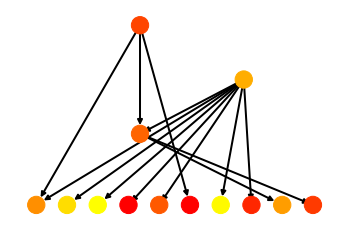

In [83]:
if results['data_graph'] is not None:
    results['data_graph'].draw()
    plt.show()

## Experiment configuration

In [84]:
results['config']

{'cuda': False,
 'seed': 2,
 'optimizer': {'Adam': {'lr': 0.0001}},
 'batch_size': 32,
 'n_epochs': 100,
 'dataset': {'train': {'synthetic_iid': {'n_hidden': 3,
    'n_observations': 10,
    'n_examples_per_env': 100,
    'n_envs': 10,
    'attach_proba': 0.2,
    'batch_size': 20,
    'train_val_test_prop': (0.7, 0.2, 0.1)}},
  'valid': {'synthetic_iid': {'n_hidden': 3,
    'n_observations': 10,
    'n_examples_per_env': 100,
    'n_envs': 10,
    'attach_proba': 0.2,
    'batch_size': 20,
    'train_val_test_prop': (0.7, 0.2, 0.1)}}},
 'model': {'env_VAE': {'layers': [10, 3], 'aux_layers': [3, 3], 'beta': 1}},
 'experiment_name': 'syntheticexp'}

## Reconstruction loss

In [85]:
all_train_loss, all_valid_loss = load_all_losses(name='recon_loss')

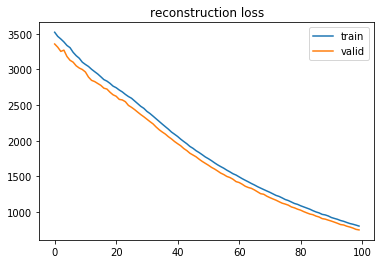

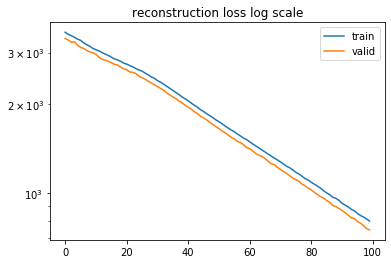

In [86]:
plt.plot(all_train_loss, label="train")
plt.plot(all_valid_loss, label="valid")
plt.title("reconstruction loss")
plt.legend()
plt.show()

plt.yscale("log")
plt.plot(all_train_loss, label="train")
plt.plot(all_valid_loss, label="valid")
plt.title("reconstruction loss log scale")
plt.legend()
plt.show()

## KL divergence loss

In [87]:
all_train_loss, all_valid_loss = load_all_losses(name='kl_div')

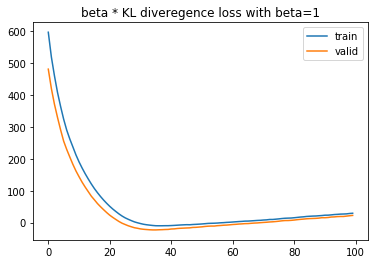

In [88]:
plt.plot(all_train_loss, label="train")
plt.plot(all_valid_loss, label="valid")
plt.title("beta * KL diveregence loss with beta=" + str(results['config']['model'][model_name]['beta']))
plt.legend()
plt.show()

## Activation statistics

In [89]:
model = configuration.setup_model(results['config'])
model.load_state_dict(torch.load(os.path.join(result_dir, "best_model_" + str(seed) + ".pth.tar")))
valid_loader = configuration.setup_dataloader(results['config'], 'valid')

valid split of size 200 with number of environments 2


RDKit WARNING: [18:44:41] Enabling RDKit 2019.09.3 jupyter extensions


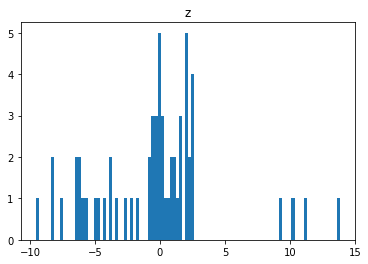

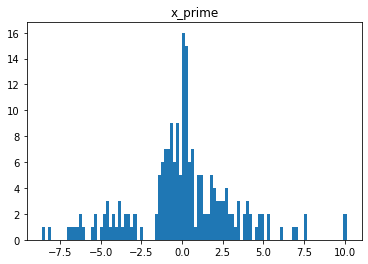

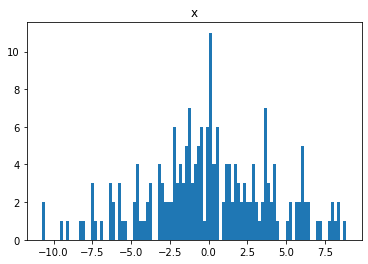

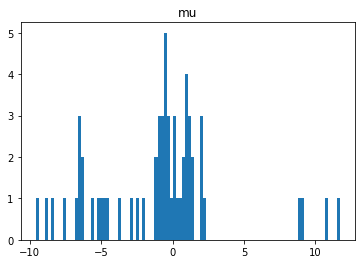

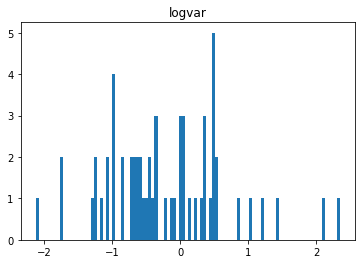

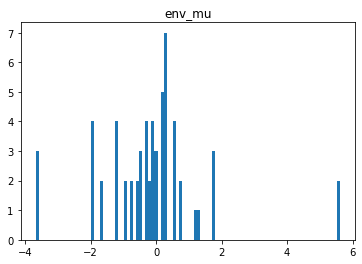

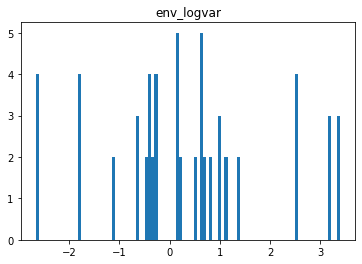

In [90]:
with torch.no_grad():
    for batch_idx, data in enumerate(valid_loader):

        x, fingerprint, compound, line = data

        # Expected to return a dictionary of outputs.
        outputs = model.forward(x, fingerprint, compound, line)
        for key in outputs.keys():
            plt.hist(outputs[key].numpy().reshape(-1), bins=100)
            plt.title(key)
            plt.show()
        break

In [93]:
with torch.no_grad():
    for batch_idx, data in enumerate(valid_loader):

        x, fingerprint, compound, line = data

        # Expected to return a dictionary of outputs.
        outputs = model.forward(x, fingerprint, compound, line)
        print(outputs["env_logvar"][0], fingerprint[0])

tensor([ 0.7951, -0.3852,  0.6723]) tensor([0., 0., 0.])
tensor([-0.2961, -1.7772,  2.5142]) tensor([0.0000, 3.5674, 0.0000])
tensor([-0.3560, -0.6217, -0.4335]) tensor([-2.4775,  0.0000,  0.0000])
tensor([ 0.6162, -0.6133,  0.9742]) tensor([0.0000, 0.5847, 0.0000])
tensor([-0.2961, -1.7772,  2.5142]) tensor([0.0000, 3.5674, 0.0000])
tensor([ 0.1947, -0.4524,  0.1891]) tensor([ 0.0000,  0.0000, -1.6461])
tensor([ 0.1947, -0.4524,  0.1891]) tensor([ 0.0000,  0.0000, -1.6461])
tensor([ 0.1665, -0.4556,  0.1664]) tensor([ 0.0000,  0.0000, -1.7234])
tensor([ 0.6162, -0.6133,  0.9742]) tensor([0.0000, 0.5847, 0.0000])
tensor([-0.2961, -1.7772,  2.5142]) tensor([0.0000, 3.5674, 0.0000])


In [29]:
model

VariationalAutoEncoder(
  (encoder): LinearLayers(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (model): Dummy()
  )
  (mu): LinearLayers(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (model): Sequential(
      (0): Linear(in_features=978, out_features=978, bias=True)
    )
  )
  (logvar): LinearLayers(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (model): Sequential(
      (0): Linear(in_features=978, out_features=978, bias=True)
    )
  )
  (decoder): LinearLayers(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (model): Sequential(
      (0): Linear(in_features=978, out_features=978, bias=True)
    )
  )
  (criterion): MSELoss()
)

torch.Size([20, 10])


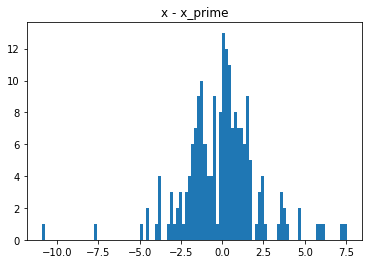

In [91]:
x_minus_x_prime = outputs['x'] - outputs['x_prime']
print(x_minus_x_prime.shape)
plt.hist(x_minus_x_prime.numpy().reshape(-1), bins=100)
plt.title('x - x_prime')
plt.show()